# *gnlearn*: Quick Start

In [1]:
# Install gnlearn

if (!requireNamespace('devtools', quietly=TRUE))
    install.packages('devtools')
devtools::install_github('rlebron-bioinfo/gnlearn')

Skipping install of 'gnlearn' from a github remote, the SHA1 (9b516cb3) has not changed since last install.
  Use `force = TRUE` to force installation



In [2]:
# Import gnlearn
library(gnlearn)

Loading required package: foreach

Loading required package: snow

Loading required package: doSNOW

Loading required package: iterators



In [3]:
# List datasets of human breast cancer
list.datasets(sp.common='human', cell.identity='breast cancer')

,download.code,sp.scientific,sp.common,bio.layer,seq.protocol,cell.identity,n.genes,n.cells,ref.authors,ref.doi,raw.dataset
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,1,Homo sapiens,Human,Transcription,10x Chromium,Breast Cancer Cell Line (MCF7),544,4367,Ben-David et al. 2018,10.1038/s41586-018-0409-3,https://github.com/rlebron-bioinfo/gnlearn-datasets/raw/master/Homo_sapiens/Transcription/Ben-David2018/breast_cancer_MCF7_rep1.tsv.gz
2,2,Homo sapiens,Human,Transcription,10x Chromium,Breast Cancer Cell Line (MCF7),552,4806,Ben-David et al. 2018,10.1038/s41586-018-0409-3,https://github.com/rlebron-bioinfo/gnlearn-datasets/raw/master/Homo_sapiens/Transcription/Ben-David2018/breast_cancer_MCF7_rep2.tsv.gz
3,3,Homo sapiens,Human,Transcription,10x Chromium,Breast Cancer Cell Line (MCF7),531,7372,Ben-David et al. 2018,10.1038/s41586-018-0409-3,https://github.com/rlebron-bioinfo/gnlearn-datasets/raw/master/Homo_sapiens/Transcription/Ben-David2018/breast_cancer_MCF7_rep3.tsv.gz
4,4,Homo sapiens,Human,Transcription,10x Chromium,Breast Cancer Cell Line (MCF7),527,5600,Ben-David et al. 2018,10.1038/s41586-018-0409-3,https://github.com/rlebron-bioinfo/gnlearn-datasets/raw/master/Homo_sapiens/Transcription/Ben-David2018/breast_cancer_MCF7_rep4.tsv.gz


In [4]:
# Download the first one (download.code == 1)
bc.df <- download.dataset(1)

In [5]:
# Select the 50 most variable genes and the 500 most variable cells
bc.filtered <- filter.dataset(bc.df, max.genes=50, max.cells=500, genes.criteria='variance', cells.criteria='variance', min.non.zeros=10, cor=FALSE)

In [6]:
# Use Hill-Climbing to discover causal relationships between genes
bc.hc <- boot.hc(bc.filtered, R=200, threshold=0.9, to='igraph')


2/200 (  1%) [-----------------------------------] 00:00:00 | eta:  2m

3/200 (  2%) [>----------------------------------] 00:00:01 | eta:  1m

4/200 (  2%) [>----------------------------------] 00:00:01 | eta:  1m

5/200 (  2%) [>----------------------------------] 00:00:05 | eta:  3m

6/200 (  3%) [>----------------------------------] 00:00:05 | eta:  3m

7/200 (  4%) [>----------------------------------] 00:00:06 | eta:  3m

8/200 (  4%) [>----------------------------------] 00:00:07 | eta:  3m

9/200 (  4%) [=>---------------------------------] 00:00:11 | eta:  4m

10/200 (  5%) [=>--------------------------------] 00:00:11 | eta:  4m

11/200 (  6%) [=>--------------------------------] 00:00:13 | eta:  4m

12/200 (  6%) [=>--------------------------------] 00:00:15 | eta:  4m

13/200 (  6%) [=>--------------------------------] 00:00:17 | eta:  4m

14/200 (  7%) [=>--------------------------------] 00:00:17 | eta:  4m

15/200 (  8%) [==>-------------------------------] 00:00:20 | e

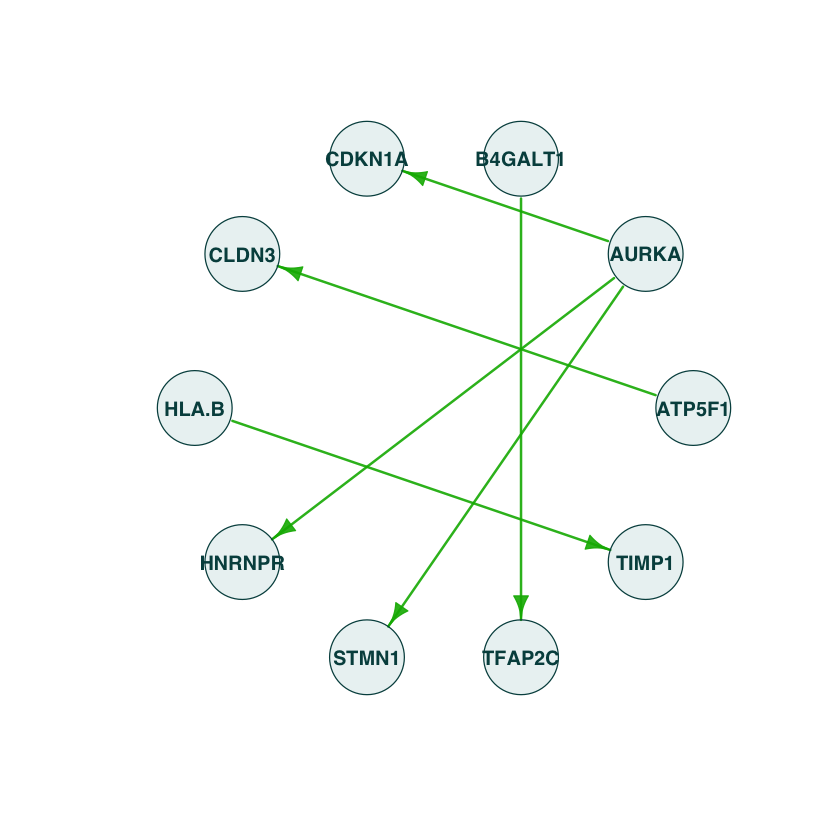

In [7]:
# Plot average graph
graph.plot(bc.hc$average)

In [8]:
# Export average graph
export.graph(bc.hc$average, 'breast_cancer_boot_hc.tsv', to='adjacency')